In [1]:
#importing all libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#reading the data

df=pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\pga08 0nline\thyroidData.csv')
df.head()

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referralSource,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,NaN,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,NaN,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,NaN,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [3]:
df.shape

(2690, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2689 non-null   float64
 1   gender          2690 non-null   object 
 2   Thyroxine       2690 non-null   object 
 3   queryThyroxine  2690 non-null   object 
 4   antithyroid     2690 non-null   object 
 5   sick            2690 non-null   object 
 6   pregnant        2690 non-null   object 
 7   I131treatment   2690 non-null   object 
 8   hypothyroid     2690 non-null   object 
 9   hyperthyroid    2690 non-null   object 
 10  lithium         2690 non-null   object 
 11  tumor           1494 non-null   object 
 12  hypopituitary   2690 non-null   object 
 13  TSH             2419 non-null   float64
 14  T3              2120 non-null   float64
 15  TT4             2518 non-null   float64
 16  T4U             2410 non-null   float64
 17  FTI             2412 non-null   f

In [5]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2689.000000,2419.000000,2120.000000,2518.000000,2410.000000,2412.000000
mean,51.908144,4.514698,2.021274,109.065687,0.998238,110.707007
std,20.504412,19.649899,0.825092,35.416772,0.194800,32.531258
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.000000,0.435000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.000000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


In [6]:
# searching for duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2685    False
2686    False
2687    False
2688    False
2689    False
Length: 2690, dtype: bool

In [7]:
#dropping duplicates values

df.drop_duplicates()

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referralSource,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,NaN,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,NaN,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,NaN,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,70.0,M,f,f,f,f,f,f,f,f,f,NaN,f,2.70,NaN,155.0,1.05,148.0,SVI,negative
2686,73.0,M,f,t,f,f,f,f,f,f,f,NaN,f,NaN,0.7,63.0,0.88,72.0,other,negative
2687,75.0,M,f,f,f,f,f,f,f,t,f,NaN,f,NaN,NaN,147.0,0.80,183.0,other,negative
2688,60.0,F,f,f,f,f,f,f,f,f,f,NaN,f,1.40,NaN,100.0,0.83,121.0,other,negative


In [8]:
df.isnull().sum()

age                  1
gender               0
Thyroxine            0
queryThyroxine       0
antithyroid          0
sick                 0
pregnant             0
I131treatment        0
hypothyroid          0
hyperthyroid         0
lithium              0
tumor             1196
hypopituitary        0
TSH                271
T3                 570
TT4                172
T4U                280
FTI                278
referralSource       0
class                0
dtype: int64

In [9]:
num_list=df.select_dtypes(include= np.number)
num_list

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.30,2.5,125.0,1.14,109.0
1,23.0,4.10,2.0,102.0,NaN,NaN
2,46.0,0.98,NaN,109.0,0.91,120.0
3,70.0,0.16,1.9,175.0,NaN,NaN
4,70.0,0.72,1.2,61.0,0.87,70.0
...,...,...,...,...,...,...
2685,70.0,2.70,NaN,155.0,1.05,148.0
2686,73.0,NaN,0.7,63.0,0.88,72.0
2687,75.0,NaN,NaN,147.0,0.80,183.0
2688,60.0,1.40,NaN,100.0,0.83,121.0


In [10]:
cat_list= df.select_dtypes(include=object)
cat_list

,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,referralSource,class
0,F,f,f,f,f,f,f,f,f,f,f,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,NaN,f,other,negative
2,M,f,f,f,f,f,f,f,f,f,NaN,f,other,negative
3,F,t,f,f,f,f,f,f,f,f,NaN,f,other,negative
4,F,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,M,f,f,f,f,f,f,f,f,f,NaN,f,SVI,negative
2686,M,f,t,f,f,f,f,f,f,f,NaN,f,other,negative
2687,M,f,f,f,f,f,f,f,t,f,NaN,f,other,negative
2688,F,f,f,f,f,f,f,f,f,f,NaN,f,other,negative


### EDA

In [11]:
df['class'].value_counts()


negative                     2562
increased binding protein     120
decreased binding protein       8
Name: class, dtype: int64

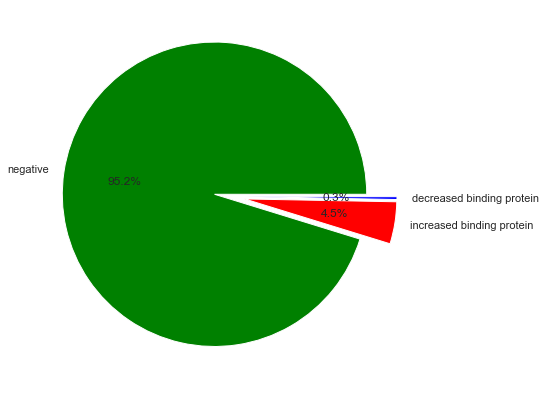

In [12]:
plt.figure(figsize = (12, 7))
labels = ['negative', 'increased binding protein', 'decreased binding protein']
explode = [.1, .1, .1]
mycolors = ['Green', 'Red' ,'Blue']
sizes = df['class'].value_counts().values

plt.pie(sizes, explode, labels, autopct="%1.1f%%", colors = mycolors)
plt.show()

this chart shows that it is a imbalance data set where negative is having 95.2% of data

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


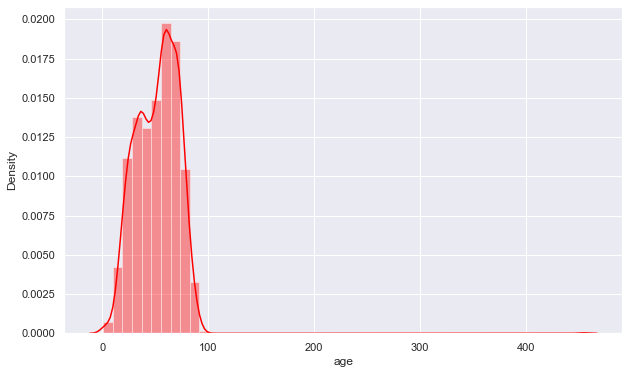

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


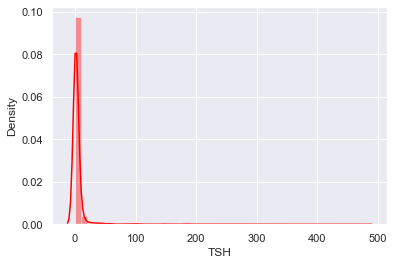

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


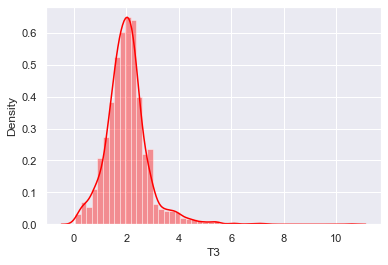

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


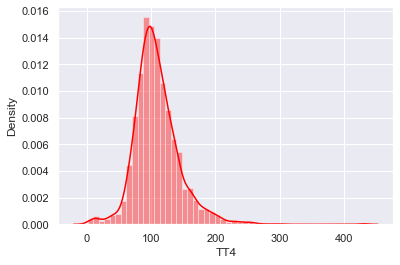

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


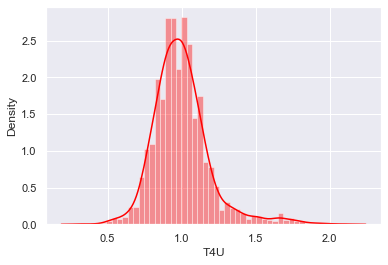

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


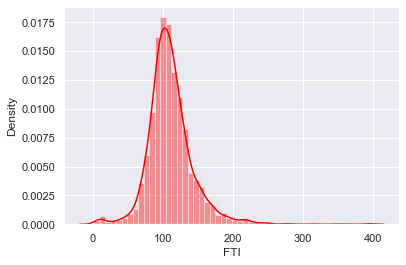

In [13]:
#visualization of  numerical varibles

plt.figure(figsize = (10, 6))

for i in num_list.columns:
    sns.distplot(df[i], color = 'red')
    plt.show()

expect TSH and AGE all other numerical variables are almost normally distributed

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


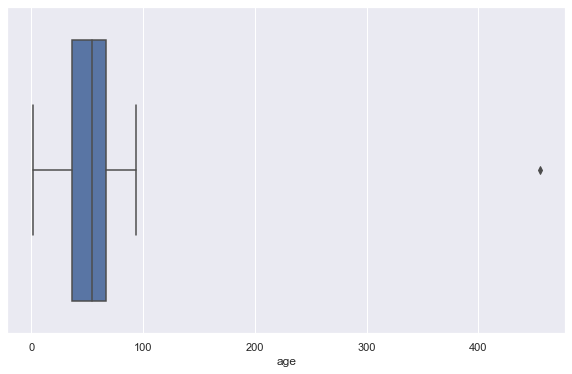

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


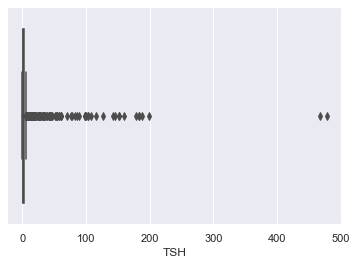

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


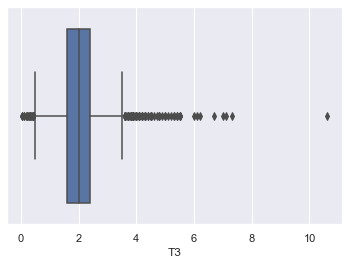

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


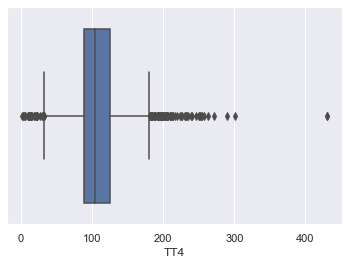

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


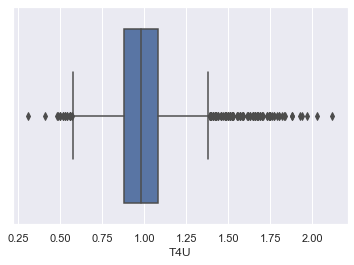

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


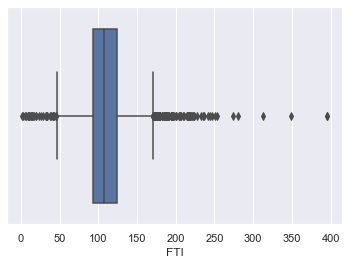

In [14]:
plt.figure(figsize = (10, 6))

for i in num_list.columns:
    sns.boxplot(df[i])
    plt.show()

all variable have an outliers. we will deal with the outliers later steps

In [15]:
cat_list.columns

Index(['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'referralSource', 'class'],
      dtype='object')

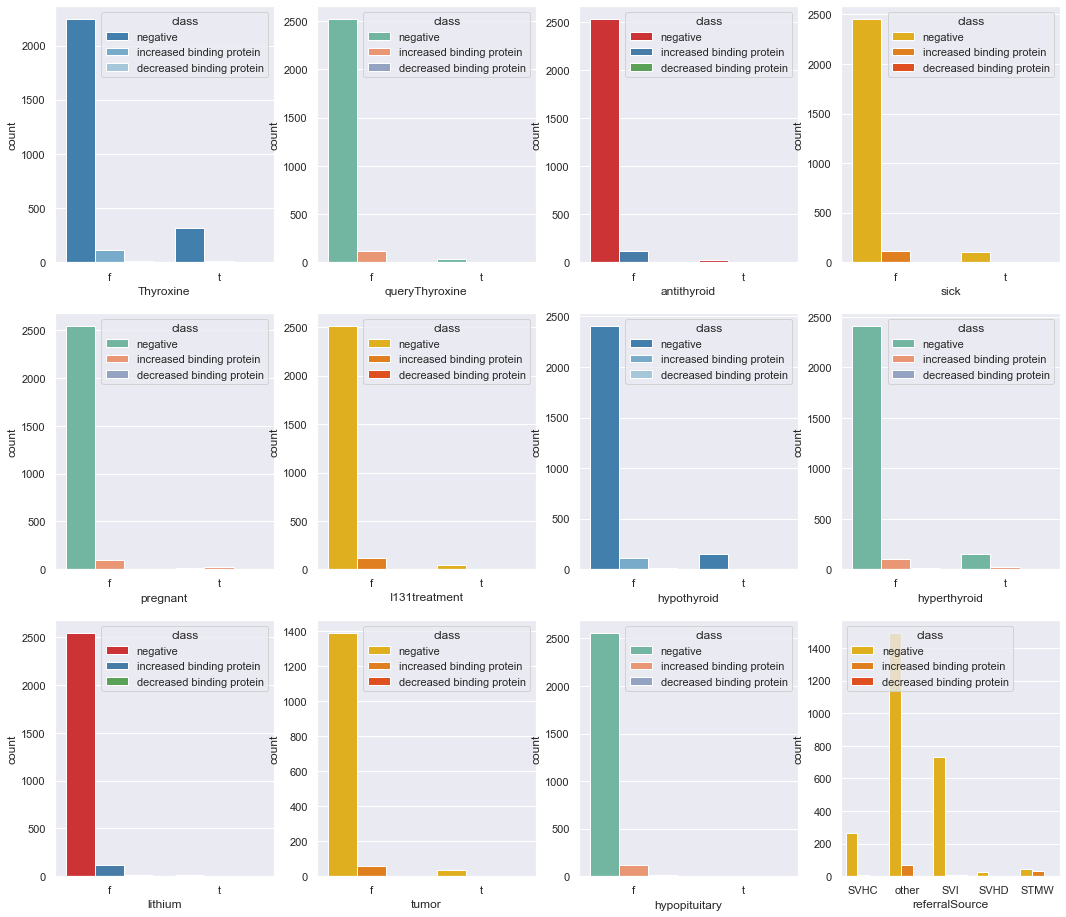

In [16]:
# Plot the countplot to analyze the relation between dependent and independent variables

fig, ax = plt.subplots(3, 4, figsize = (18, 16))

sns.countplot(x = 'Thyroxine', hue = 'class', data = df, palette = 'tab20c', ax = ax[0][0])

sns.countplot(x = 'queryThyroxine', hue = 'class', data = df, palette = 'Set2', ax = ax[0][1])

sns.countplot(x = 'antithyroid', hue = 'class', data =df, palette = 'Set1', ax = ax[0][2])

sns.countplot(x = 'sick', hue = 'class', data = df, palette = 'autumn_r', ax = ax[0][3])

sns.countplot(x = 'pregnant', hue = 'class', data = df, palette = 'Set2', ax = ax[1][0])

sns.countplot(x = 'I131treatment', hue = 'class', data =df, palette = 'autumn_r', ax = ax[1][1])

sns.countplot(x = 'hypothyroid', hue = 'class', data = df, palette = 'tab20c', ax = ax[1][2])

sns.countplot(x = 'hyperthyroid', hue = 'class', data = df, palette = 'Set2', ax = ax[1][3])

sns.countplot(x = 'lithium', hue = 'class', data =df, palette = 'Set1', ax = ax[2][0])

sns.countplot(x = 'tumor', hue = 'class', data = df, palette = 'autumn_r', ax = ax[2][1])

sns.countplot(x = 'hypopituitary', hue = 'class', data = df, palette = 'Set2', ax = ax[2][2])

sns.countplot(x = 'referralSource', hue = 'class', data =df, palette = 'autumn_r', ax = ax[2][3])


plt.show()

###  FEATURE ENGINEERING

In [17]:
#replacing the value in target column

df['class'].value_counts()

negative                     2562
increased binding protein     120
decreased binding protein       8
Name: class, dtype: int64

In [18]:
df['class']= df['class'].replace({'decreased binding protein':'negative'})

In [19]:
df['class'].value_counts()


negative                     2570
increased binding protein     120
Name: class, dtype: int64

### handling missing value

In [20]:
df.isnull().sum()

age                  1
gender               0
Thyroxine            0
queryThyroxine       0
antithyroid          0
sick                 0
pregnant             0
I131treatment        0
hypothyroid          0
hyperthyroid         0
lithium              0
tumor             1196
hypopituitary        0
TSH                271
T3                 570
TT4                172
T4U                280
FTI                278
referralSource       0
class                0
dtype: int64

In [21]:
df['age'].fillna(df['age'].median() , inplace=True)

In [22]:
df['age'].fillna(df['age'].median() , inplace=True)
df['TSH'].fillna(df['TSH'].median() , inplace=True)
df['T3'].fillna(df['T3'].median() , inplace=True)
df['TT4'].fillna(df['TT4'].median() , inplace=True)
df['T4U'].fillna(df['T4U'].median() , inplace=True)
df['FTI'].fillna(df['FTI'].median() , inplace=True)
df['tumor'].fillna(df['tumor'].mode()[0] , inplace=True)

In [23]:
df.isnull().sum()

age               0
gender            0
Thyroxine         0
queryThyroxine    0
antithyroid       0
sick              0
pregnant          0
I131treatment     0
hypothyroid       0
hyperthyroid      0
lithium           0
tumor             0
hypopituitary     0
TSH               0
T3                0
TT4               0
T4U               0
FTI               0
referralSource    0
class             0
dtype: int64

### HANDLING CATERGORICAL DATA

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cat_list:
    df[i]= le.fit_transform(df[i])

In [25]:
df.head()

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referralSource,class
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1,1
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,0.98,107.0,4,1
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0,0.91,120.0,4,1
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,0.98,107.0,4,1
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,3,1


### OUTLIER HANDLING

In [26]:
Q1 = df.TSH.quantile(0.25)
Q3 = df.TSH.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.TSH>= Q1 - 3*IQR) & (df.TSH <= Q3 + 3*IQR)]

In [27]:
Q1 = df.T3.quantile(0.25)
Q3 = df.T3.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.T3>= Q1 - 1.5*IQR) & (df.T3 <= Q3 + 1.5*IQR)]

In [28]:
Q1 = df.TT4.quantile(0.25)
Q3 = df.TT4.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.TT4>= Q1 - 1.5*IQR) & (df.TT4 <= Q3 + 1.5*IQR)]

In [29]:
Q1 = df.T4U.quantile(0.25)
Q3 = df.T4U.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.T4U>= Q1 - 1.5*IQR) & (df.T4U <= Q3 + 1.5*IQR)]

In [30]:
Q1 = df.FTI.quantile(0.25)
Q3 = df.FTI.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.FTI>= Q1 - 1.5*IQR) & (df.FTI <= Q3 + 1.5*IQR)]

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thoma\anaconda3\lib\si

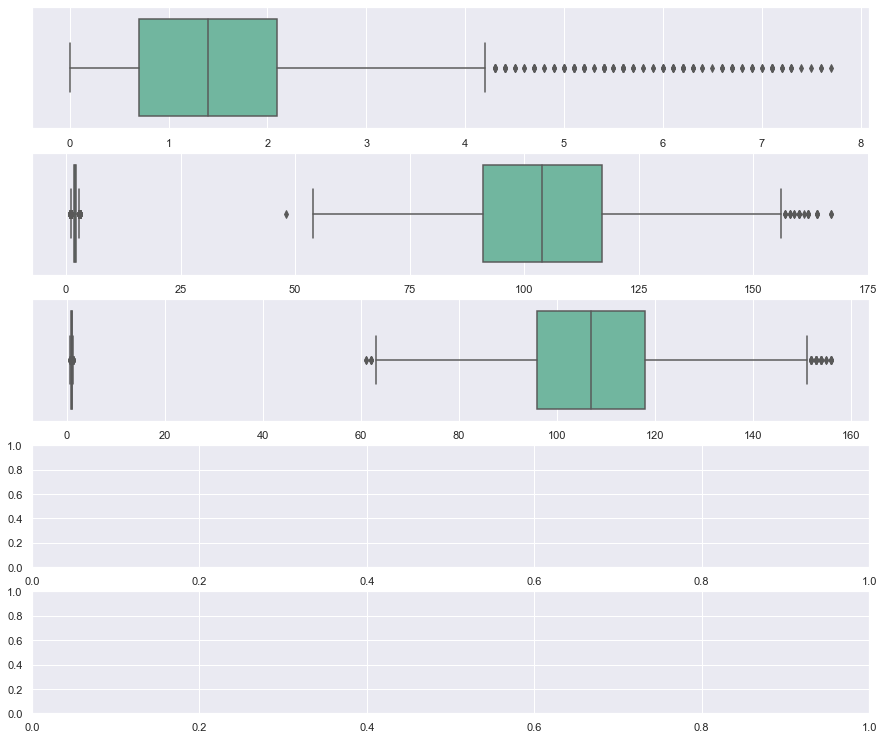

In [31]:
## Visualize the boxplot after treatment

fig, axs = plt.subplots(5,1, figsize = (15, 13))
plt1 = sns.boxplot(df['TSH'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(df['T3'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(df['T4U'], ax = axs[2], palette = 'BuGn')
plt1 = sns.boxplot(df['TT4'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(df['FTI'], ax = axs[2], palette = 'BuGn')

plt.show()

###  FEATURE SELECTION

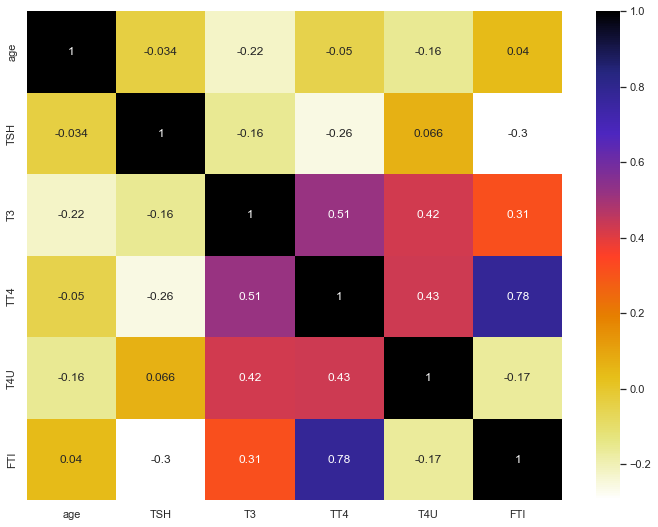

In [32]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap

plt.figure(figsize = (12, 9))
cor = num_list.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

from the heat map we can find out that there is multicollinearity between the features. let's conform it with VIF 

In [33]:
## Chi-Square Test

from sklearn.feature_selection import chi2

In [34]:
cat_list.columns

Index(['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'referralSource', 'class'],
      dtype='object')

In [35]:
data = df[['gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'referralSource', 'class']]

In [36]:
x1= data.drop(['class'], axis = 'columns')
y1= data['class']

In [37]:
f_value=chi2(x1,y1)
f_value

(array([ 3.34133155,  0.87612203,  1.36804171,  0.27517448,  1.06480558,
        12.31373934,  0.78442681,  0.0474964 ,  2.76389396,  0.1555334 ,
        21.77598455,         nan,  0.03659962]),
 array([6.75599156e-02, 3.49266027e-01, 2.42148630e-01, 5.99881622e-01,
        3.02121696e-01, 4.49636289e-04, 3.75790673e-01, 8.27478442e-01,
        9.64133038e-02, 6.93302552e-01, 3.06411606e-06,            nan,
        8.48282524e-01]))

In [38]:
p_value = pd.Series(f_value[1], index= x1.columns)
p_value

gender            0.067560
Thyroxine         0.349266
queryThyroxine    0.242149
antithyroid       0.599882
sick              0.302122
pregnant          0.000450
I131treatment     0.375791
hypothyroid       0.827478
hyperthyroid      0.096413
lithium           0.693303
tumor             0.000003
hypopituitary          NaN
referralSource    0.848283
dtype: float64

In [39]:
cols=[]
for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

gender  :- Accept Null Hypothesis
Thyroxine  :- Accept Null Hypothesis
queryThyroxine  :- Accept Null Hypothesis
antithyroid  :- Accept Null Hypothesis
sick  :- Accept Null Hypothesis
pregnant  :- Reject Null Hypothesis
I131treatment  :- Accept Null Hypothesis
hypothyroid  :- Accept Null Hypothesis
hyperthyroid  :- Accept Null Hypothesis
lithium  :- Accept Null Hypothesis
tumor  :- Reject Null Hypothesis
hypopituitary  :- Accept Null Hypothesis
referralSource  :- Accept Null Hypothesis


In [40]:
cols

['gender',
 'Thyroxine',
 'queryThyroxine',
 'antithyroid',
 'sick',
 'I131treatment',
 'hypothyroid',
 'hyperthyroid',
 'lithium',
 'hypopituitary',
 'referralSource']

In [41]:
# drop the features that will not add any value to my model

df.drop(labels = cols, axis = 1, inplace = True)

In [42]:
df.shape

(2030, 9)

### splitting the data and model building

In [43]:
#splitting data
X= df.drop(columns='class', axis= 1)
y=df['class']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [45]:
X_train.shape, X_test.shape

((1624, 8), (406, 8))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Fit the Logistic Regression Model

# create the instance of logistic regression model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Make a prediction for the testing set
y_pred_lr = lr.predict(X_test)


In [49]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [50]:
# Make a prediction for the testing set
y_pred_dt = dt.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
# print the accuracy on test data

print("Accuracy Score on test data with Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score on test data with Decision Tree:", accuracy_score(y_test, y_pred_dt))

Accuracy Score on test data with Logistic Regression: 0.9852216748768473
Accuracy Score on test data with Decision Tree: 0.9901477832512315


In [52]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_lr))
print('Recall Score:', recall_score(y_test, y_pred_dt))

Recall Score: 0.9975062344139651
Recall Score: 1.0


In [53]:
# print the classification report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      0.99       401

    accuracy                           0.99       406
   macro avg       0.49      0.50      0.50       406
weighted avg       0.98      0.99      0.98       406



In [54]:
# print the F1-score

print('F1 Score:', f1_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_dt))

F1 Score: 0.9925558312655087
F1 Score: 0.9950372208436724


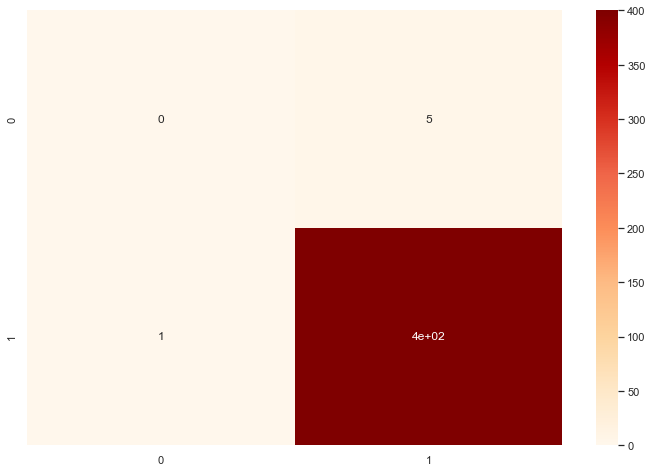

In [55]:
## Plot the confusion matrix

plt.figure(figsize = (12, 8))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show()

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=23)
X_sm, y_sm = sm.fit_resample(X, y)

In [57]:
# Fit the Logistic Regression Model

# create the instance of logistic regression model
clf1 = LogisticRegression()

# fit the model
clf1.fit(X_train, y_train)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# Fit the Decision Tree Model

# create the instance of DT model
clf2 = DecisionTreeClassifier()

# fit the model
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
# Make a prediction for the testing set
y_pred_lr1 = clf1.predict(X_test)
y_pred_dt2 = clf2.predict(X_test)

In [61]:
# print the accuracy on test data

print("Accuracy Score on test data with Logistic Regression:", accuracy_score(y_test, y_pred_lr1))
print("Accuracy Score on test data with Decision Tree:", accuracy_score(y_test, y_pred_dt2))

Accuracy Score on test data with Logistic Regression: 0.9852216748768473
Accuracy Score on test data with Decision Tree: 0.9876847290640394


In [62]:
# print the F1-score

print('F1 Score with LR:', f1_score(y_test, y_pred_lr1))
print('F1 Score with DT:', f1_score(y_test, y_pred_dt2))

F1 Score with LR: 0.9925558312655087
F1 Score with DT: 0.9938042131350682
